We will come up with a mutual inclination distribution parameterized as follows

$$
\theta = \pi u
$$

where $\theta \in (0, \pi)$ and $u \in (0, 1)$. We'll fit using the logistic transformation, where

$$
\mathrm{logit}(x) = \ln \left (\frac{x}{1 - x} \right)
$$
and
$$
\mathrm{logit}^{-1}(y) = \frac{e^y}{1 + e^y}
$$

Let $v = \mathrm{logit}(u)$, so that $v \in (-\infty, \infty)$. Now that this is a continuous distribution, we can define our mutual inclination distribution 

$$
p(v|\mu, \tau) = {\cal N}(v | \mu, \tau)
$$

where $\mu$ is the mean and $\tau$ is the precison or inverse variance. Given choices of $\mu$ and $\tau$ we want to get a handle on what $p(u)$ looks like so that we know how to set priors on these variables. According to PyMC3 docs,

$$
p(u | \mu, \tau) = \frac{1}{u(1 - u)} \sqrt{\frac{\tau}{2 \pi}} \exp \left (-\frac{\tau}{2} \left (\mathrm{logit}(u) - \mu \right)^2 \right)
$$

In [9]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "retina"
from ipywidgets import interactive, interact
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, HTML

In [10]:
def p(u, mu, tau):
    v = np.log(u / (1 - u))
    return 1/(u * (1-u)) * np.sqrt(tau / (2 * np.pi)) * np.exp(-0.5 * tau * (v - mu)**2)

In [19]:
us = np.linspace(0.001, 0.999, num=200)

def update(mu, tau):
    fig, ax = plt.subplots(nrows=1)
    line, = ax.plot(us * 180., p(us, mu, tau))
    ax.set_xlabel(r"$u$")
    ax.set_ylabel(r"$p(u)$")

# def update(mu, tau):
#     print("setting values to", mu, tau)
#     line.set_data(us, p(us, mu, tau))
#     fig.canvas.draw()
    

In [40]:
w = interactive(update, mu=(-5.0, 5.0), tau=(0.5, 20, 0.1))
display(w)

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0), FloatSlider(value=10.200000…

In [76]:
def cauchy(x, beta):
        return 2 / (np.pi * beta * (1 + ((x - 0.5)/beta)**2))

def gaussian(x, mu, sigma):
    return np.exp(-0.5 * (x - mu)**2/(sigma**2))

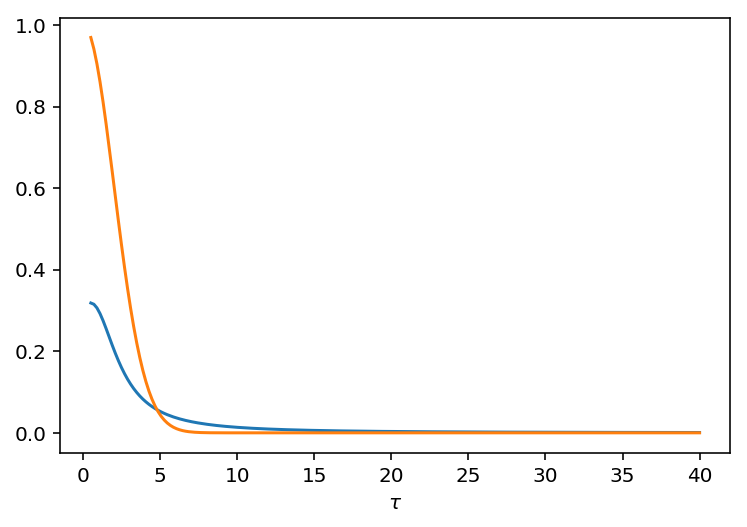

In [78]:
xs = np.linspace(0.5, 40, num=200)
cs = cauchy(xs, 2.0)
gs = gaussian(xs, 0.0, 2.0)
plt.plot(xs, cs)
plt.plot(xs, gs)
plt.xlabel(r"$\tau$");

Let's look like what a random sampling of these functions would look like, for $\theta$. We'll need to generate random samples from the Cauchy distribution.


In [81]:
N = 50
# taus = np.abs(np.random.standard_cauchy(N)) * 2 + 0.5
taus = np.abs(np.random.normal(loc=0., scale=4.0, size=N)) + 0.5
mus = np.random.normal(loc=0., scale=2.0, size=N)

us = np.linspace(1e-04, 1 - 1e-04, num=500)

ps = [p(us, mu, tau) for (mu, tau) in zip(mus, taus)]

# normalize to peak value 
pn = [p/np.max(p) for p in ps]

(0, 1.02)

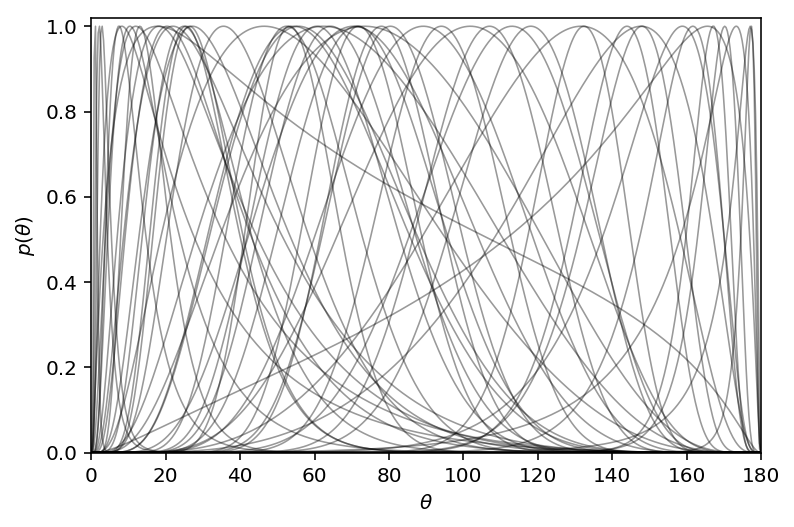

In [85]:
fig, ax = plt.subplots(nrows=1)

for i in range(N):
    ax.plot(us * 180.0, pn[i], lw=0.8, color="k", alpha=0.4)

ax.set_xlabel(r"$\theta$");
ax.set_ylabel(r"$p(\theta)$");
ax.set_xlim(0, 180)
ax.set_ylim(0, 1.02)